# Preprocessing the data

## Imports

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../scripts'))

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from torchvision import datasets
from torchvision.transforms.v2 import ToPILImage

from scripts.transformer import transformer
import torch

## Vars

In [3]:
FER_path = '../.data/input'
train_dataset_output_path = '../.data/output/train_dataset.pth'
test_dataset_output_path = '../.data/output/test_dataset.pth'
emotions_output_path = '../.data/output/emotions.csv'

test_image_path = '../.data/output/test.png'

## Transformer
Below we will make the transformer for the images in the FER dataset.

```python
transformer = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Horizontal flip for augmentation
    transforms.RandomRotation(10),  # Random rotation (between -10 to 10 degrees)
    transforms.RandomAffine(translate=(0.1, 0.1), degrees=30),  # Random translation and rotation (up to 30 degrees)
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.RandomResizedCrop(48, scale=(0.8, 1.0)),  # Random crop and resize to 48x48
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5], std=[0.5]),  # Normalize to [-1, 1]
])
```

## Load datasets

In [4]:
train_dataset = datasets.FER2013(
    root=FER_path, split='train', transform=transformer,
)
test_dataset = datasets.FER2013(
    root=FER_path, split='test', transform=transformer,
)

### Check of dataset

In [5]:
def plot_images(dataset, transform: bool = True):
    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(1, 5, figure=fig)

    for i in range(5):
        image, _ = dataset[0]
        ax = fig.add_subplot(gs[i // 5, i % 5])
        ax.imshow(image.permute(1, 2, 0) if transform else image, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

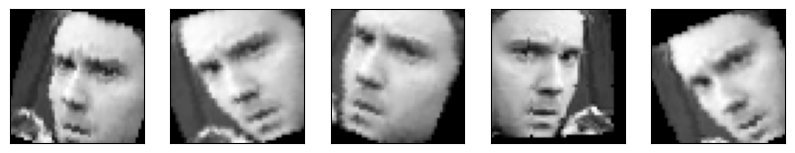

In [6]:
plot_images(train_dataset, transform=True)

We can see by the images above that the images are transformed everytime they are called. Below we will create a temp dataset without transformation to check that the original images are not transformed.

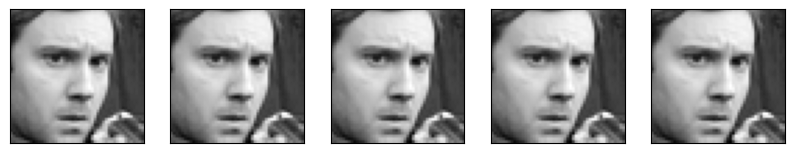

In [7]:
no_transform_dataset = datasets.FER2013(
    root=FER_path, split='train',
)

plot_images(no_transform_dataset, transform=False)

## Saving
Below we will save the datasets so we can use them in the next notebooks.

In [8]:
torch.save(train_dataset, train_dataset_output_path)
torch.save(test_dataset, test_dataset_output_path)

### Saving image

In [13]:
image, label = datasets.FER2013(
    root=FER_path, split='test',
)[7]
to_pil = ToPILImage()
pil_image = to_pil(image)

pil_image.save(test_image_path)
label

0